In [9]:
import pandas as pd
import uproot
import numpy as np
import cmath
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import moments
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = True
obsList = ['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9', 'S1s', 'S2s', 'S1c', 'S2c', 'S6s']
optObsList = ['FL', 'P1', 'P2', 'P3', 'P4p', 'P5p', 'P6p', 'P8p']
totalObsList = ['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9', 'S1s', 'S2s', 'S1c', 'S2c', 'P1', 'P2', 'P3', 'P4p', 'P5p', 'P6p', 'P8p','S6s','S6c']
optimisedObsTranslator = {'FL' : 'FL', 'S3' : 'P1', 'S4' : 'P4p', 'S5' : 'P5p', 'AFB' : 'P2', 'S7' : 'P6p', 'S8' : 'P8p', 'S9' : 'P3', 'S1s' : 'S1s', 'S2s' : 'S2s', 'S1c' : 'S1c', 'S2c' : 'S2c', 'M1s' : 'M1s', 'M2s' : 'M2s', 'M1c' : 'M1c', 'M2c' : 'M2c'}
obs_to_label = {'FL' : '$F_{L}$', 'S3' : '$S_{3}$', 'S4' : '$S_{4}$', 'S5' : '$S_{5}$', 'AFB' : '$A_{FB}$', 'S7' : '$S_{7}$', 'S8' : '$S_{8}$', 'S9' : '$S_{9}$',
                'M1s' : '$M_{1}^{s}$', 'M2s' : '$M_{2}^{s}$', 'M1c' : '$M_{1}^{c}$', 'M2c' : '$M_{2}^{c}$', 'S1s' : '$S_{1}^{s}$', 'S2s' : '$S_{2}^{s}$', 'S1c' : '$S_{1}^{c}$', 'S2c' : '$S_{2}^{c}$',
                'P1' : '$P_{1}$', 'P2' : '$P_{2}$', 'P3' : '$P_{3}$', 'P4p' : '$P_{4}^{\prime}$', 'P5p' : '$P_{5}^{\prime}$', 'P6p' : '$P_{6}^{\prime}$', 'P8p' : '$P_{8}^{\prime}$','M6s':'$M_{6}^{s}$',
                'M6c':'$M_{6}^{s}$', 'S6s' : '$S_{6}^{s}$', 'S6c' : '$S_{6}^{c}$'}

In [4]:
_f = uproot.open("observables_unbinned_Bbar_ForBinned_SM_flavioSM_newDC7_wMassTerms_fixed_swave.root")

In [10]:
obs_vals = {}
q2_vals = []
for _o in obsList:
    if _o in ["AFB"]:
        continue
    tvals = _f["gr_obs_med_%s" % _o.lower()].values()
    q2_vals = tvals[0]
    obs_vals[_o] = tvals[1]

In [36]:
obs_vals["denom"] = np.sqrt(-1.*obs_vals["S2s"]*obs_vals["S2c"])
    
obs_vals["P1"] = 0.5*(obs_vals["S3"]/obs_vals["S2s"])
obs_vals["P2"] = (1./8.)*(obs_vals['S6s']/obs_vals['S2s'])
obs_vals["P3"] = -0.25*obs_vals["S9"]/obs_vals["S2s"]
obs_vals["P4p"] = 0.5*obs_vals["S4"]/obs_vals["denom"]
obs_vals["P5p"] = 0.5*obs_vals["S5"]/obs_vals["denom"]
obs_vals["P6p"] = 0.5*obs_vals["S7"]/obs_vals["denom"]
obs_vals["P8p"] = 0.5*obs_vals["S8"]/obs_vals["denom"]

In [37]:
# Some ratios for Quim
mb = 4.8
mB = 5.28
mbh = 4.8/5.28
mB2 = mB**2
q2arr = q2_vals
sh = q2arr/mB2

p_arr = obs_vals

z = np.sqrt(4.*p_arr['P2']**2 - 8.*p_arr['P2']*p_arr['P4p']*p_arr['P5p'] + p_arr['P5p']**2)
A_B = 8.*(0.892**2 / mB2)*sh/((1. - sh)**2)


c9_c7_ratio = -(mbh)*(1 + (p_arr['P5p']*(sh - 1.))/(z) + sh )
c9_c7_ratio /= sh

ff_ratio = np.sqrt((p_arr["FL"]/(1.-p_arr["FL"])) * A_B * ((p_arr["P5p"] + z)**2/(p_arr["P2"]**2)))
ff_ratio *= (1./np.sqrt(2))

/tmp/ipykernel_929151/751525564.py:11: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(4.*p_arr['P2']**2 - 8.*p_arr['P2']*p_arr['P4p']*p_arr['P5p'] + p_arr['P5p']**2)


Text(0, 0.5, 'FF ratio')

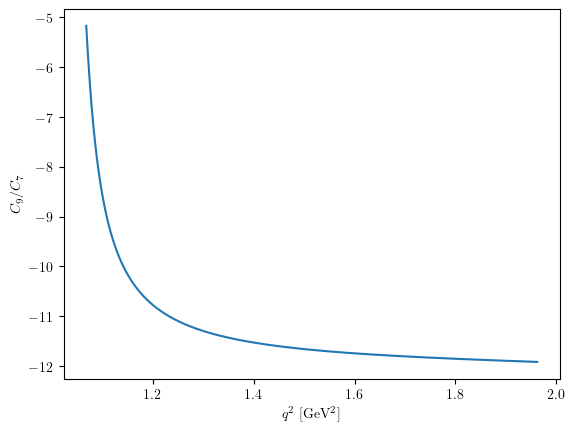

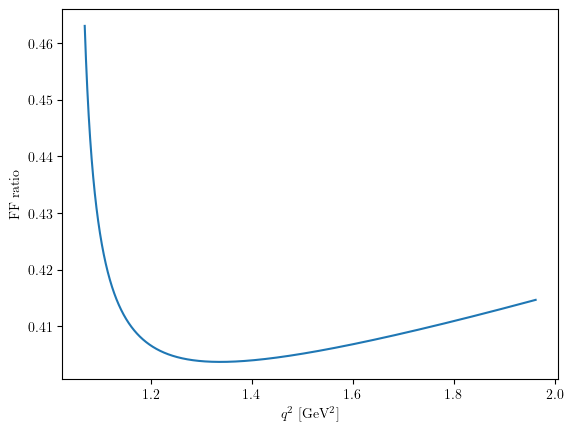

In [31]:
plt.figure()
plt.plot(q2arr[16000:30000], c9_c7_ratio[16000:30000])
plt.xlabel("$q^{2}$ [GeV$^{2}$]")
plt.ylabel("$C_{9}/C_{7}$")

plt.figure()
plt.plot(q2arr[16000:30000], ff_ratio[16000:30000])
plt.xlabel("$q^{2}$ [GeV$^{2}$]")
plt.ylabel("FF ratio")
#print(q2arr.reshape(1000)[:4000])
#print( gaussian_filter1d(c9_c7_ratio, sigma=50))

In [19]:
len(q2arr)

300000

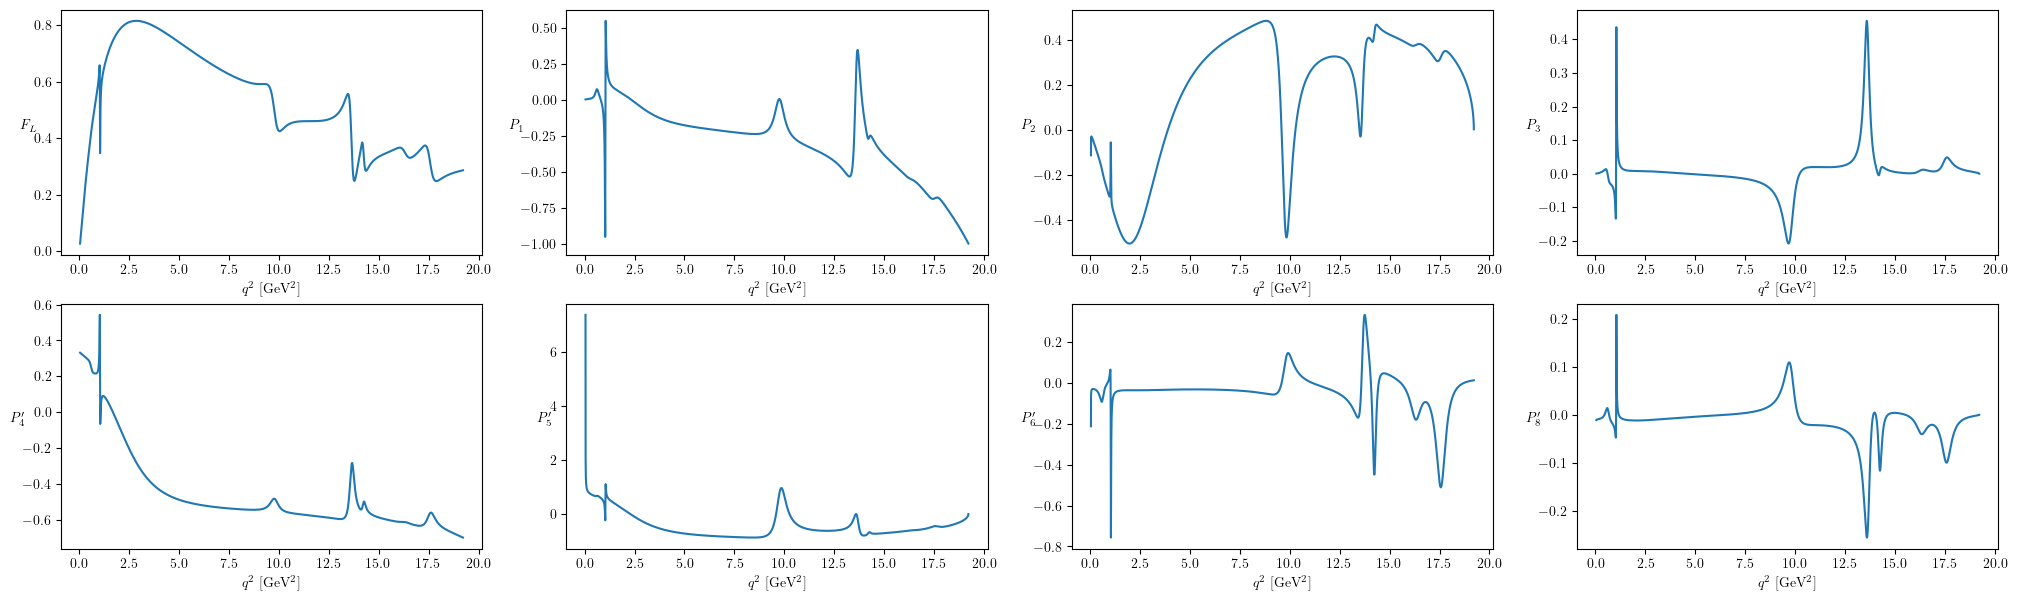

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = optObsList[_i]
        if _i == len(optObsList):
            break
        _obs = optObsList[_i]
        while _obs in ['M1s', 'M1c', 'M2s', 'M2c']:
            _i += 1
            if _i == len(optObsList):
                break
            _obs = optObsList[_i]
        _col.plot(q2arr, obs_vals[_obs])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[_obs], rotation=0)
        _i += 1